In [1]:
# Description:
#   Exercise3 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.
# Preparations
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from numpy.fft import fftshift, fft2
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter, map_coordinates
from scipy.ndimage.filters import convolve as conv2
from scipy.ndimage.filters import convolve1d as conv1

# from utils import rgb2gray, imnoise, add_gaussian_noise, gaussian2, affinefit

# CS-E4850 Computer Vision Exercise Round 3

## Exercise 2 - Hybrid images
In  this  task  you  will  need  to  construct  a  hybrid  image  that  combines  facial images  of  a  wolf  and  a  man.  In  addition,  visualize  the  log  magnitudes  of  the  Fourier transforms  of  the  original  images  and  their  low-pass  and  high-pass  filtered  versions  (i.e.constituents  of  the  hybrid  image).<br><br>(Hint:  You  can  use  the  numpy.fft's  functions fft2 and fftshift as  shown  in  lecture  slides.)

In [2]:
## Load test images
man = imread('./assets/man.jpg') / 255.
wolf = imread('./assets/wolf.jpg') / 255.

In [3]:
# fit an affine model between two 2d point sets
def affinefit(x, y):
    # Ordinary least squares (check wikipedia for further details):
    # 
    # Y                          = P*X_aug            % X_aug is in homogenous coords (one sample per col)
    # Y'                         = X_aug'*P'          % take transpose from both sides
    # X_aug*Y'                   = X_aug*X_aug'*P'    % multiply both sides from left by X_aug
    # inv(X_aug*X_aug')*X_aug*Y' = P'                 % multiply both sides from left by the inverse of X_aug*X_aug' 
    n = x.shape[0]
    x = x.T
    y = y.T
    x_aug = np.concatenate((x, np.ones((1, n))), axis=0)
    y_aug = np.concatenate((y, np.ones((1, n))), axis=0)
    xtx = np.dot(x_aug, x_aug.T)
    xtx_inv = np.linalg.inv(xtx)
    xtx_inv_x = np.dot(xtx_inv, x_aug)   
    P = np.dot(xtx_inv_x, y_aug.T)  
    A = P.T[0:2, 0:2]
    b = P.T[0:2, 2]

    return A, b

In [4]:
# the pixel coordinates of eyes and chin have been manually found 
# from both images in order to enable affine alignment 
man_eyes_chin=np.array([[452, 461], [652, 457], [554, 823]])
wolf_eyes_chin=np.array([[851, 919], [1159, 947], [975, 1451]])
A, b = affinefit(man_eyes_chin, wolf_eyes_chin)

In [5]:
xv, yv = np.meshgrid(np.arange(0, man.shape[1]), np.arange(0, man.shape[0]))
pt = np.dot(A, np.vstack([xv.flatten(), yv.flatten()])) + np.tile(b, (xv.size,1)).T
wolft = map_coordinates(wolf, (pt[1,:].reshape(man.shape), pt[0,:].reshape(man.shape)))

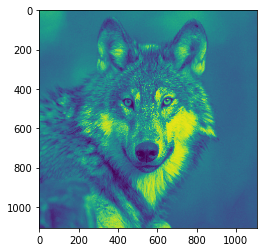

In [6]:
plt.imshow(wolft)

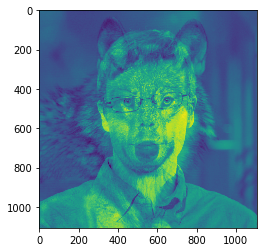

In [7]:
## Below we simply blend the aligned images using additive superimposition
additive_superimposition = man + wolft
plt.imshow(additive_superimposition)

In [8]:
## Next we create two different Gaussian kernels for low-pass filtering
## the two images

# naive blending by additive superimposition for illustration
superimpose = man + wolft

In [9]:
# low-pass filter the two images using two different Gaussian kernels
sigmaA = 16
sigmaB = 8
man_lowpass = gaussian_filter(man, sigmaA, mode='nearest')
wolft_lowpass = gaussian_filter(wolft, sigmaB, mode='nearest')

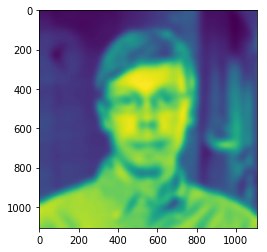

In [10]:
plt.imshow(man_lowpass)

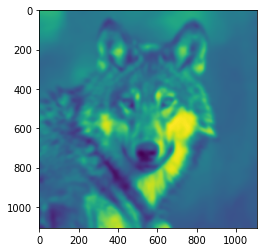

In [11]:
plt.imshow(wolft_lowpass)

In [12]:
wolft_highpass = np.zeros(man_lowpass.shape);
wolft_highpass.shape

(1107, 1107)

In [13]:
wolft_highpass = np.subtract(wolft, wolft_lowpass)

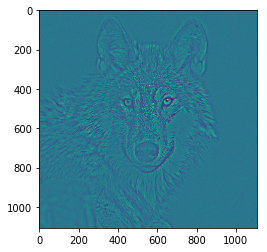

In [14]:
plt.imshow(wolft_highpass)

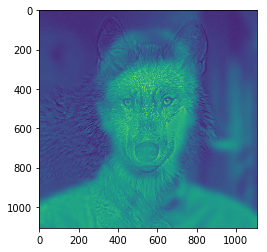

In [15]:
## Your task is to create a hybrid image by combining a low-pass filtered 
## version of the human face with a high-pass filtered wolf face
hybrid_image = man_lowpass + wolft_highpass
plt.imshow(hybrid_image)

### Notice how strongly the interpretation of the hybrid image is affected by the viewing distance

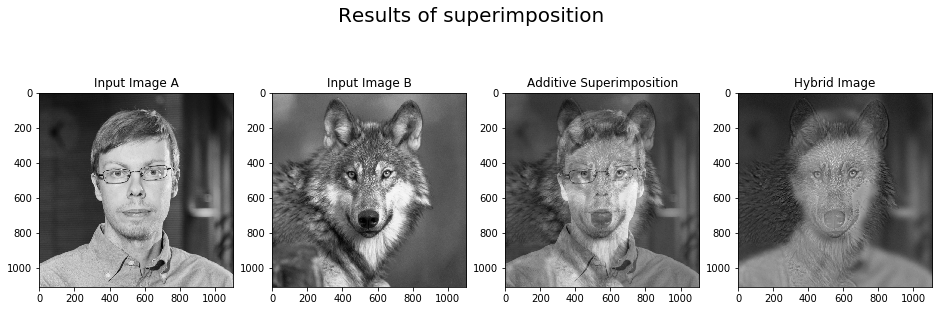

In [16]:
## Display input images and both output images.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
plt.suptitle("Results of superimposition", fontsize=20)
ax = axes.ravel()
ax[0].imshow(man, cmap='gray')
ax[0].set_title("Input Image A")
ax[1].imshow(wolft, cmap='gray')
ax[1].set_title("Input Image B")
ax[2].imshow(additive_superimposition, cmap='gray')
ax[2].set_title("Additive Superimposition")
ax[3].imshow(hybrid_image, cmap='gray')
ax[3].set_title("Hybrid Image")
plt.subplots_adjust(top=1.2)
plt.show()

In [17]:
from numpy import fft

`numpy.fft.fft2`
Compute the 2-dimensional discrete Fourier Transform (FTT)

`numpy.fft.fftshift`
Shift the zero-frequency component to the center of the spectrum.

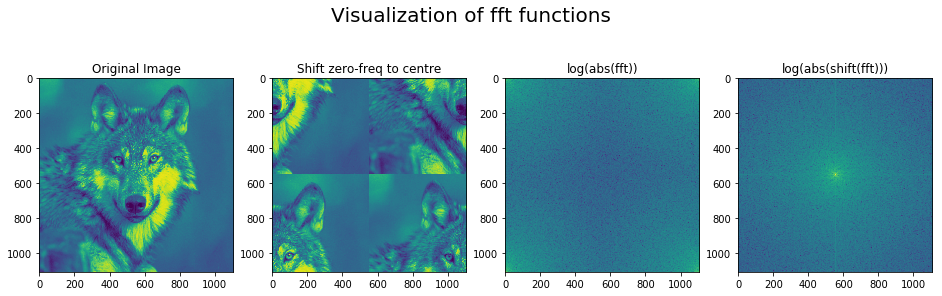

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
# ax = axes.ravel()

plt.suptitle("Visualization of fft functions", fontsize=20)

# example
x = wolft

axes[0].imshow(x)
axes[0].set_title("Original Image")

axes[1].imshow(fft.fftshift(x))
axes[1].set_title("Shift zero-freq to centre")

axes[2].imshow(np.log(np.abs(fft.fft2(x))))
axes[2].set_title("log(abs(fft))")

axes[3].imshow(np.log(np.abs(fft.fftshift(fft.fft2(x)))))
axes[3].set_title("log(abs(shift(fft)))")

plt.subplots_adjust(top=1.25) # adjust suptitle position
plt.show()

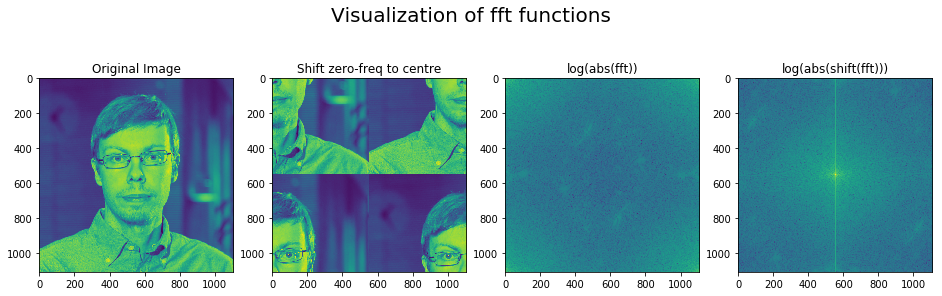

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
# ax = axes.ravel()

plt.suptitle("Visualization of fft functions", fontsize=20)

# example
x = man

axes[0].imshow(x)
axes[0].set_title("Original Image")

axes[1].imshow(fft.fftshift(x))
axes[1].set_title("Shift zero-freq to centre")

axes[2].imshow(np.log(np.abs(fft.fft2(x))))
axes[2].set_title("log(abs(fft))")

axes[3].imshow(np.log(np.abs(fft.fftshift(fft.fft2(x)))))
axes[3].set_title("log(abs(shift(fft)))")

plt.subplots_adjust(top=1.25) # adjust suptitle position
plt.show()

In [20]:
from numpy import fft

## Finally, visualize the log magnitudes of the Fourier
## transforms of the original image
def shifted_transform(image):
    return fft.fftshift(fft.fft2(image))

F_man = shifted_transform(man)
F_man_lowpass = shifted_transform(man_lowpass)
F_wolft = shifted_transform(wolft)
F_wolft_highpass = shifted_transform(wolft_highpass)

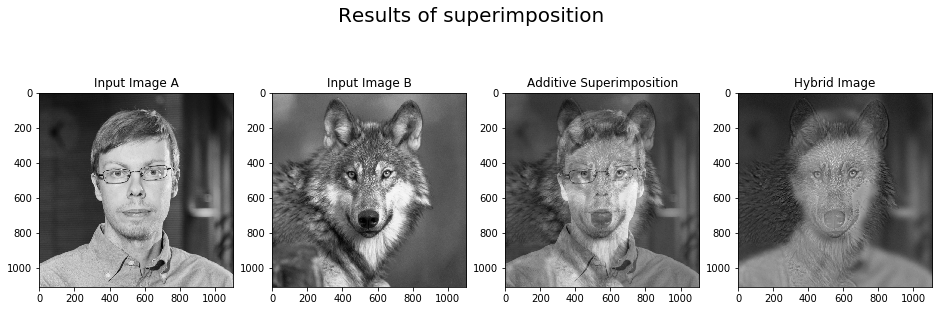

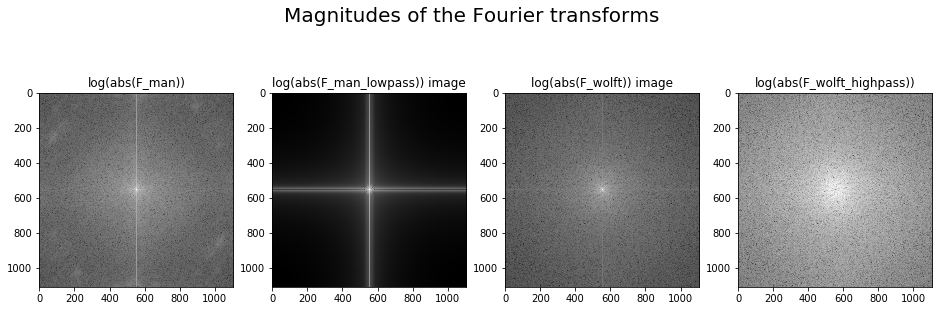

In [21]:
## Display input images and both output images.
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
plt.suptitle("Results of superimposition", fontsize=20)
ax = axes.ravel()
ax[0].imshow(man, cmap='gray')
ax[0].set_title("Input Image A")
ax[1].imshow(wolft, cmap='gray')
ax[1].set_title("Input Image B")
ax[2].imshow(additive_superimposition, cmap='gray')
ax[2].set_title("Additive Superimposition")
ax[3].imshow(hybrid_image, cmap='gray')
ax[3].set_title("Hybrid Image")
plt.subplots_adjust(top=1.2)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8))
plt.suptitle("Magnitudes of the Fourier transforms", fontsize=20)
ax = axes.ravel()

ax[0].imshow(np.log(np.abs(F_man)), cmap='gray')
ax[0].set_title("log(abs(F_man))")
ax[1].imshow(np.log(np.abs(F_man_lowpass)), cmap='gray')
ax[1].set_title("log(abs(F_man_lowpass)) image")
ax[2].imshow(np.log(np.abs(F_wolft)), cmap='gray')
ax[2].set_title("log(abs(F_wolft)) image")
ax[3].imshow(np.log(np.abs(F_wolft_highpass)), cmap='gray')
ax[3].set_title("log(abs(F_wolft_highpass))")
plt.subplots_adjust(top=1.2)
plt.show() 